# Project: Car Sales - Błażej Kloc

## Wprowadzenie

Zbiór danych na jakim pracowano w tym projekcie pierwonie pochodzi z z niemieckiej story eBay, zawierał pierwotnie 370000 rekordów z danymi dotyczącymi samochodów sprzedawanych na wspomnianej stronie.

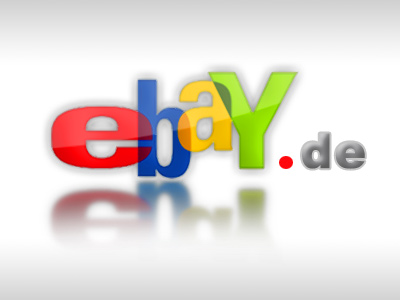

Zbiór danych został na potrzeby projektu zmniejszony do 50000.

#### Zawartość zbioru danych:
* `dateCrawled` - data umieszczenia na stronie
* `name` - nazwa samochodu
* `seller` - sprzedawca: prywatny/dealer samochodowy
* `offerType `- rodzaj oferty
* `price` - cena widoczna na aukcji
* `abtest` - czy oferta była w testach A/B (control - grupa kontrolna)
* `vehicleType` - typ nadwozia
* `yearOfRegistration` - rok pierwszego zarejestrowania samochodu
* `gearbox` - skrzynia biegów
* `powerPS` - moc auta w PS
* `model` - model
* `odometer` - przebieg
* `monthOfRegistration` - miesiąc pierwszego zarejestrowania samochodu
* `fuelType` - rodzaj paliwa
* `brand` - marka
* `notRepairedDamage` - czy auto posiada uszkodzenia do naprawy (0 - nie 1 - tak)
* `dateCreated` - data utworzenia oferty na eBay
* `nrOfPictures` - liczba zdjęć na aukcji
* `postalCode` - kod pocztowy, miejscowości gdzie auto się znajduje
* `lastSeenOnline` - kiedy oferta była otworzona ostatnio


#### Import bibliotek i danych
w celu zaimportowania danych użyto biblioteki pandas, dane były zaszyfrowane w standardzie `Latin-1`, więc zmieniono ich kodowanie. Wyświetlono `head()` i `info() `w celu przyjżenia się danym dokładniej

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/IsraelAde/dataquest-projects/master/Project%204-%20Exploring%20eBay%20Car%20Sales%20Data/autos.csv"
auta = pd.read_csv(url, encoding='Latin-1')
auta.info()
auta.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Dane w naszym zbiorze są albo typu `object` albo `int`.

Można też zauważyć że dane są niepełne, kilka kolumn ma mniej niż 50000 rekordów

Nazwy kolumn są napisane tzw. camelcasem, poniżej przypisano im nowe nazwy, zaminiono tzn camelcase na snakecase, a w niektórych jaśniej opisano co oznaczją.

In [ ]:
auta.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']
auta.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


#### Wstępna eksploracja i czyszczenie danych

Użyto modułu `describe` oraz w parametrze `include` zawarto wszystkie kolummny, co pozwoliło przyjrzeć się danym bliżej


In [ ]:
auta.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


**top** opisuje najczęsciej występujący element, a **freq** ile razy pojawia się w zbiorze danych.

Można zauważyć że prawie wszystkie wartości w kolumnach `seller` oraz `offer_type` są identyczne. Dodatkowo kolumna `num_photos` zdaje się być cała wypełniona zerami. Poniżej dokładnie to sprawdzono modułem `value_counts()`

In [ ]:
auta["num_photos"].value_counts()

0    50000
Name: num_photos, dtype: int64

Teraz mając pewność można używając modułu `drop` usunąć z naszego zbioru te 3 kolumny, nie przydadzą się one w analizie. (`axis=1` przekzauje bibliotece pandas aby zostay usunięte całe kolumny)

In [ ]:
auta = auta.drop(["num_photos", "seller", "offer_type"], axis=1)

Zauważono również, że kolumny `price` i `odometer` zawierają dane liczbowe z dodatkowymi znakami nie będącymi liczbami. Użyto do tego modułu `str.replace` (zamienia on 1 argument z 2). W celu przeprowadznaia analiz, należy zamienic ten typ danych na `int`. Dodatkowo aby dane były bardziej czytelene zmaieniono `odometer` na `odometer_km`.


In [ ]:
auta["price"] = (auta["price"]
                          .str.replace("$","")
                          .str.replace(",","")
                          .astype(int)
                          )
auta["odometer"] = (auta["odometer"]
                             .str.replace("km","")
                             .str.replace(",","")
                             .astype(int)
                             )
auta.rename({"odometer": "odometer_km"}, axis=1, inplace=True)



<ipython-input-21-238eb7eb6797>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  auta["price"] = (auta["price"]




---


**Należy zauwżyć że powyższy kod zadziała tylko przy 1 uruchomieniu, gdyż później dane zostaną nadpiasne i** `.str` **nie zadziała na danych typu** `int`

---



In [ ]:
auta["price"].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [ ]:
auta["odometer_km"].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int64

#### Dalsza ekspoloracja `Odometer_km` i `Price`

In [ ]:
auta["odometer_km"].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

Taki obraz danych pokazuje że uzytkownicy wystawiając auta na eBayu musieli zaokrąglić przebieg do pewnych wartości. Prawdopodobnie wybór jest narzucony przez stornę. Widać tu również to żę więcej aut jest z większym przebiegiem.

Spojrzono również na **price**

In [ ]:
print(auta["price"].unique().shape)
print(auta["price"].describe())
auta["price"].value_counts().head(20)

(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64


0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
700      395
4500     394
300      384
2200     382
950      379
Name: price, dtype: int64

`unique().shape()` ujawnił liczbe unikalnych wartości cen aut w ilości 2357, wiąże sie to pradopodobnie z zaokrąglaniem kwot przez użytkowników. `describe() `ukazao podstawowe statystyki tej zmiennej, uwagę należy zwrócić na maksymalna wartość która wynosi 100000000 dolarów, to bardziej rozpatrzono w kolejnych obliczeniach. `value_couts()` ukazało że 1421 aut miało cene 0 dolarów, jest to ok 2% całego zbioru danych, można rozważyć usuniecie tych wierszy.

Przyjrzano się 20 najdroższym oraz najtańszym cenom za auto oraz ilości takich aut w zbiorze danych.

In [ ]:
auta['price'].value_counts().sort_index(ascending = False).head(20) #ascending = Flase, sortuje dane od największych do najmnijeszych

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

In [ ]:
auta['price'].value_counts().sort_index(ascending = True).head(15) #ascending = True, sortuje dane od najmnijeszych do największych

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
Name: price, dtype: int64

Istnieje spory skok z ceny 350000 do 999999, a powyżej 999999 jest tylko 13 samochodów. Wyczyszczono zbiór danych powyżej 350000 dolarów.

Liczba aut wystawionych za kwote poniżej 18 dolarów, nie jest może kolosalna, ale dla bezpieczeństwa powinno się te dane zostawić, mając na uwadze że eBay to serwis aukcyjny.

In [ ]:
auta = auta[auta['price'].between(1, 350000)]
auta['price'].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

#### Eksploracja danych związanych z czasem

W analizowanym zbiorze danych jest kilka kolumn odncoszących się do czasu:

* `date_crawled`
* `last_seen`
* `ad_created`
* `registration_month`
* `registration_year`

Trzy pierwsze są typu `string`, w calu ich analizy należy zamienić je na dane numeryczne.

Podgląd danych typu `string`:


In [ ]:
auta[['date_crawled','ad_created','last_seen']][0:10]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50
5,2016-03-21 13:47:45,2016-03-21 00:00:00,2016-04-06 09:45:21
6,2016-03-20 17:55:21,2016-03-20 00:00:00,2016-03-23 02:48:59
7,2016-03-16 18:55:19,2016-03-16 00:00:00,2016-04-07 03:17:32
8,2016-03-22 16:51:34,2016-03-22 00:00:00,2016-03-26 18:18:10
9,2016-03-16 13:47:02,2016-03-16 00:00:00,2016-04-06 10:46:35


Do analiz na potrzebyu projektu potrzebna jest wyłącznie data (bez godziny). Jak można zauważyć po danych, datę określa 10 pierwszych znaków danego stringa.


Aby nie tracić brakujących wartości w rozkładzie oraz aby wyświetlić udział procentowy, a nie liczność użyto: `.value_counts(normalize=True, dropna=False) ` a w celu ułożenia danych od najwcześniejszych do najpóźniejszych użyto `.sort_index()`

In [ ]:
(auta['date_crawled']
        .str[:10]
        .value_counts(normalize = True, dropna = False)
        .sort_index()
        )

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

Można zauważyć, że rozkład jest jednolity

In [ ]:
(auta['ad_created']
        .str[:10]
        .value_counts(normalize = True, dropna = False)
        .sort_index()
        )

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

Można zauważyć, że większość dat utworzonia aukcji miały podobne ramy czasowe jak daty umieszczenia na stronie. Niższa częstotliwość aukcji tworzonych przed tymi datami jest zrozumiała, ponieważ po zakończeniu sprzedaży aukcje mogą zostać usunięte i nie będą pojawiać się w witrynie przed datami zarejestrowanymi.

In [ ]:
(auta['last_seen']
        .str[:10]
        .value_counts(normalize = True, dropna = False)
        .sort_index()
        )

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

Ciężko jest jednoznacznie stawierdzić skąd pochodzi wzrost w warościach rozkładu z ostatnich 3 dni w kolumnie `last_seen` *(czyli informacji kiedy auckaj zosgtała usunięta z witryny, najczęsciej na skutek sprzedarzy)*

Kolumne  registration_year należy przeczyścić, ponieważ zawiera infoamcje nieprawdziwe. Np. rok produkcji auta 1000 (czyli przed ich wynalezieniem) lub 9999 czyli daleką przyszłość. Pozycje powyżej 2016 roku można usunąć, a za początek produkcji aut, przyjęto rok 1900.


In [ ]:
(auta['registration_year'].between(1900,2016)).sum() / auta.shape[0]

0.961206630289303

Postanowiono usunąć te dane, tracąc ich niecałe 4%.

In [ ]:
auta = auta[auta['registration_year'].between(1900, 2016)]

Sprawdzono 10 najczęściej występujących roczników

In [ ]:
auta['registration_year'].value_counts(normalize = True).head(15)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
2008    0.047450
2009    0.044665
1997    0.041794
2011    0.034768
2010    0.034040
Name: registration_year, dtype: float64

Jak widać, większość samochodów w zbiorze zostało wyprodukowanych w ostatnich 20 latach (od 2016)

#### Eksploracja danych dotyczących ceny na podstawie marki samochodu.

Sprawdzenie częstości występowania danej marki

In [ ]:
auta['brand'].value_counts(normalize = True)

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

Pierwsza piatka to marki niemieckie, najczęściej na niemieckim eBayu sprzedaje się volkswageny, które swoja ilością dorównują bmw i oplowi łącznie.

Postanowiono skupić się jedynie na marakch których udział w zbiorze danych przekracza 5%.

In [ ]:
marki = auta['brand'].value_counts(normalize = True)
najpopularniejsze_marki = marki[marki > 0.05].index
najpopularniejsze_marki

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [ ]:
marki_sr_ceny = {}

for marki in najpopularniejsze_marki: #dla kazdej marki w liście najpopularniejsze_marki
    marka = auta[auta['brand'] == marki] #marka to df zawierajaca tylko dane iterowanej marki auta
    sr_cena = marka['price'].mean() # sr_cena to średnai wartość kolumny price z df iterowanej marki auta
    marki_sr_ceny[marki] = int(sr_cena) #utworzenie w slowniku klucza z marką i przypisanie jej wartości sr_cena

marki_sr_ceny

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

Na podstawie średnich cen mozna wyciągnąć następujace wnioski:
* Najtaniej z pierwszej piątki wypada Opel
* Audi, Mercedes i BMW są średnio najdroższe
* Volkswagen jest gdzieś pomiędzy pierwszą trójką a Oplem, co może wpływać na jego popularność

Czas porównać ceny z przebiegiem i zobaczyć czy istnieje związek między nimi.

W tym celu utworzono nowy df zawierający kolumny potrzebne d otej analizy.

In [ ]:
#Słownik i pętla działająca analogicznie do tej wyżej
brand_mean_mileage = {}

for brands in najpopularniejsze_marki:
    brand_only = auta[auta['brand'] == brands]
    mean_mileage = brand_only['odometer_km'].mean()
    brand_mean_mileage[brands] = int(mean_mileage)

brand_mean_mileage

{'volkswagen': 128707,
 'bmw': 132572,
 'opel': 129310,
 'mercedes_benz': 130788,
 'audi': 129157,
 'ford': 124266}

In [ ]:
mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending = False)
mean_price = pd.Series(marki_sr_ceny).sort_values(ascending = False)

klucze ze słownika stają sie obiektami w series.
następnie utworzono, jednokolumnowy df, potem dodano kolejną kolumnę.

In [ ]:
top_brand_info = pd.DataFrame(mean_mileage, columns = ['mean_mileage'])
top_brand_info

,mean_mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
ford,124266


In [ ]:
top_brand_info['mean_price'] = mean_price
top_brand_info

,mean_mileage,mean_price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


#### Wnioski
Ciekawy projekt, na pewno nauczył mnie dużo o czyszczeniu danych, tego na jak wiele rzeczy należy zwrócić uwagę nawet przy obliczaniu prostych średnich czy korelaci zmiennych. Poza tym otworzył przede mną chęć ekspolracji tego typu danych ale związach ze sprzętem elektorinicznym.